<Figure size 640x480 with 1 Axes>

   education default  balance housing loan
0   tertiary      no   2143.0     yes   no
1  secondary      no     29.0     yes   no
2  secondary      no      2.0     yes  yes
3    unknown      no   1506.0     yes   no
4    unknown      no      1.0      no   no
- missing data before removal :  45211
education    1857
default         0
balance         0
housing         0
loan            0
dtype: int64
- missing data after removal :  43354
education    0
default      0
balance      0
housing      0
loan         0
dtype: int64
       education  default  balance  housing  loan
0              1        0   2143.0        1     0
1              0        0     29.0        1     0
2              0        0      2.0        1     1
3              1        0    231.0        1     0
4              1        0    447.0        1     1
5              1        1      2.0        1     0
6              0        0    121.0        1     0
7              0        0    593.0        1     0
8              0        

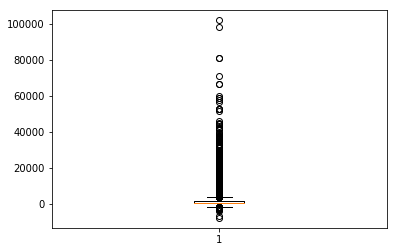

17
137
- data before removing redundancy :  43354
- data after removing redundancy :  43200
[[0.         0.06715397 1.         0.        ]
 [0.         0.02197145 1.         0.        ]
 [0.         0.02139437 1.         1.        ]
 ...
 [0.         0.14349833 0.         0.        ]
 [0.         0.03562879 0.         0.        ]
 [0.         0.08485082 0.         0.        ]]
DecisionTree =  gini
[0.6956723  0.69382087 0.69212963 0.69768519 0.69421296 0.69351852
 0.68912037 0.69282407 0.6943737  0.69460523]
cv_scores mean:0.6937962843925332

DecisionTree =  entropy
[0.6956723  0.69382087 0.69212963 0.69768519 0.69421296 0.69351852
 0.6900463  0.69282407 0.69298449 0.69414216]
cv_scores mean:0.6937036489230743

Logistic =  solver :   liblinear  / max_iter :  50
[0.69659801 0.69682944 0.68240741 0.69699074 0.6912037  0.69699074
 0.69097222 0.69421296 0.69715212 0.68140773]
cv_scores mean:0.6924765076945478

Logistic =  solver :   liblinear  / max_iter :  100
[0.69659801 0.69682944 0.682

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sn
import matplotlib.pyplot as plt

df = pd.read_csv("bank-full.csv", sep=';')

#plt.figure(figsize=(15, 15))
df.plot()
plt.show()
#df.hist(rwidth=0.8) # Dataset Distribution

# Data Preprocessing
#1) Data Restructuring - table vertical decomposition
# 사용하지 않는 열 삭제(remove features do not affect on economy)
df.drop(['age', 'job', 'marital', 'contact', 'day', 'month', 'duration', 
         'campaign', 'pdays', 'previous', 'poutcome','y'], axis='columns', inplace=True)

df = df.astype({"balance" : float}) # 'balance'의 타입을 int에서 float로
print(df.head(5))

# 2) Data Restructuring - data value changes
# cleaning data

# missing data : 'unknown' 값을 NaN으로 치환하기
df = df.replace("unknown", np.nan)

print("- missing data before removal : ", len(df)),
print(df.isnull().sum()) # missing data 확인
df = df.dropna(axis=0) # NaN가 있는 행 삭제
print("- missing data after removal : ", len(df)),
print(df.isnull().sum()) # missing data 확인

df = df.reset_index(drop=True) # 인덱스를 재설정

# education의 값을 두가지로 축소하기
# primary + secondary -> 초중고 교육
# tertiary -> 고등학교 이후의 교육
df = df.replace("primary", "compulsory")
df = df.replace("secondary", "compulsory")

# print(df.head(10))

# # Redundancy 제거
# print("- data before removing redundancy : ", len(df))
# df = df.drop_duplicates()
# print("- data after removing redundancy : ", len(df))

#print(df.head(20))

# Feature Engineering
# Label Encoding
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

labelEncoder.fit(df['education'])
df['education'] = labelEncoder.transform(df['education'])
labelEncoder.fit(df['default'])
df['default'] = labelEncoder.transform(df['default'])
labelEncoder.fit(df['housing'])
df['housing'] = labelEncoder.transform(df['housing'])
labelEncoder.fit(df['loan'])
df['loan'] = labelEncoder.transform(df['loan'])

print(df)

plt.rcParams['figure.figsize'] = [10, 6]
%matplotlib inline

plt.boxplot(df['balance'])
plt.show()

df['balance'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

# Outlier
print(len(df[df['balance']>50000]))
print(len(df[df['balance']<-1000]))

print("- data before removing redundancy : ", len(df))
df = df[df['balance']<=50000]
df = df[df['balance']>=-1000]
print("- data after removing redundancy : ", len(df))

#classifier attribute to target
X = df.drop(['education'],axis = 1)
y = df['education'].values

#scaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X)

# # Feature Engineering - Feature Reduction(PCA)
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# X_ = StandardScaler().fit_transform(X)
# pca = PCA(n_components=4)
# pc = pca.fit_transform(X_)
# print(pc)

#Calculation kfold's accuracy
def cal(model):
    cv_scores = cross_val_score(model, X, y, cv=10)
    print(cv_scores)
    print('cv_scores mean:{}'.format(np.mean(cv_scores)))
    print()

Dscore = None
Dmodel = None

#Pick Decision Tree's max model
def update(model): 
    global Dmodel, Dscore
    cv_scores = cross_val_score(model, X, y, cv=10)
    n_score = np.mean(cv_scores)
    if (Dscore == None):
        Dscore = n_score
        Dmodel = model
    elif(n_score > Dscore):
        Dscore = n_score
        Dmodel = model

Cscore = None
Cmodel = None

#DecstionTree's all case
for case in['gini', 'entropy']:
    print("DecisionTree = " , case)
    model = DecisionTreeClassifier(criterion = case, max_depth=3, random_state=0)
    cal(model)
    update(model)
    
#Pick Logistic Regression's max model
def update2(model):
    global Cmodel, Cscore
    cv_scores = cross_val_score(model, X, y, cv=10)
    n_score = np.mean(cv_scores)
    if (Cscore == None):
        Cscore = n_score
        Cmodel = model
    elif(n_score > Cscore):
        Cscore = n_score
        Cmodel = model

Sscore = None
Smodel = None

#Logistic Regression's all case
for case in['liblinear', 'lbfgs', 'sag']:
    for max in [50, 100,200]:
        print("Logistic = " , "solver :  " , case , " / max_iter : " , max)
        model = LogisticRegression(solver = case, max_iter = max)
        cal(model)
        update2(model)
        
#Pick SVM's max model
def update3(model):
    global Smodel, Sscore
    cv_scores = cross_val_score(model, X, y, cv=10)
    n_score = np.mean(cv_scores)
    if (Sscore == None):
        Sscore = n_score
        Smodel = model
    elif(n_score > Sscore):
        Sscore = n_score
        Smodel = model

#SVM's all case
for case in[0.1, 1.0, 10.0]:
    for kernel in['linear', 'rbf', 'sigmoid']:
        for gam in[0.1, 10, 100]:
            print("SVM = " , "C : " , case , " / gamma : " , gam , 
                  " / Kernel : " , kernel)
            model = SVC(C = case, gamma = gam, kernel = kernel)
            cal(model)
            update3(model)
            
#Training max model
Dmodel = Dmodel.fit(X, y)
Cmodel = Cmodel.fit(X, y)
Smodel = Smodel.fit(X, y)

#Decision Tree's confusion matrix
confusion_matrix = pd.crosstab(y, Dmodel.predict(X), rownames=['Actual'], colnames=['Predicted'], margins= True)
sn.heatmap(confusion_matrix, annot=True, fmt = 'd')
plt.show()

#Logistic Regression's confusion matrix
confusion_matrix = pd.crosstab(y, Cmodel.predict(X), rownames=['Actual'], colnames=['Predicted'], margins= True)
sn.heatmap(confusion_matrix, annot=True, fmt = 'd')
plt.show()

#SVN's confusion matrix
confusion_matrix = pd.crosstab(y, Smodel.predict(X), rownames=['Actual'], colnames=['Predicted'], margins= True)
sn.heatmap(confusion_matrix, annot=True, fmt = 'd')
plt.show()

#Box Plot
x = ['Decision', 'Logistic', 'SVM']
y = [Dscore, Cscore, Sscore]
df = pd.DataFrame(dict(x=x, y=y))
sn.factorplot("x","y", data=df,kind="bar",size=6,aspect=2,legend_out=False)
plt.ylim(0.7,1)
plt.show()